In [1]:
#initializations
import numpy as np
#import cupy as np
import platform
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray
from os import listdir
import cv2
import random
import copy
from functools import reduce

In [2]:
# load all images in a directory
#shuffle the labels and the data in Order
def shuffle_in_unison(a, b):
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)
    return a , b

def load_directory(f_name):
    #print ("in file " + f_name)
    loaded_images = {}
    labels_list = []
    loaded_images_list = []
    for filename in listdir('flower_photos/' + f_name):
        # load image
        img_data = plt.imread('flower_photos/' + f_name + '/' + filename)
        new_img = cv2.resize(img_data,
                             dsize=(32, 32),  # 32 x 32 images
                             interpolation=cv2.INTER_CUBIC)

        loaded_images[filename] = new_img
        sorted_loaded_images = dict(
            sorted(loaded_images.items(), key=lambda x: x[0].lower()))

    for key in (sorted_loaded_images):
        labels_list.append(f_name)
        loaded_images_list.append(loaded_images[key])

    ret = np.array(loaded_images_list)
    labels = np.array(labels_list)
    testing_batch = ret[-100:]
    testing_batch_labels = labels[-100:]
    validation_batch = ret[-200:-100]
    validation_batch_labels = labels[-200:-100]
    #plt.pyplot.figure()
    #plt.pyplot.imshow(testing_batch[0])
    # print (testing_batch.shape)
    training_batch = ret[:-200].copy()
    training_batch_labels = labels[:-200].copy()
    #print(training_batch.shape)

    return testing_batch, training_batch, testing_batch_labels, training_batch_labels, validation_batch,validation_batch_labels


training_data = []
testing_data = []
training_labels = []
testing_labels = []
validation_data = []
validation_labels=[]


for directoryname in listdir('flower_photos'):
    print('in directory:' + directoryname)
    testing_batch, training_batch, testing_batch_labels, training_batch_labels,validation_batch,validation_batch_labels = load_directory(
        directoryname)
    testing_data.extend(testing_batch)
    testing_labels.extend(testing_batch_labels)
    #plt.figure()
    #plt.imshow(testing_batch[0])
    training_data.extend(training_batch)
    training_labels.extend(training_batch_labels)
    
    validation_data.extend(validation_batch)
    validation_labels.extend(validation_batch_labels)
    
    


testing_data = np.array(testing_data)
#testing_data = np.reshape(testing_data , (testing_data.shape[0], -1))
training_data = np.array(training_data)
#training_data = np.reshape(training_data , (training_data.shape[0], -1))
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

validation_labels = np.array(validation_labels)
validation_data = np.array (validation_data)
#validation_data = np.reshape(validation_data , (validation_data.shape[0], -1))

#preprocess the data (zero centered and normalized)

'''
def load_flowers ():
    return testing_data , training_data ,training_labels, testing_labels 
'''
'''
#shuffling the data
#np.random.seed(10)  
testing_data,testing_labels=shuffle_in_unison(testing_data,testing_labels)
daisy,dandelion,roses,sunflowers,tulips = np.split(testing_data,5)
daisy_lbls,dandelion_lbls,roses_lbls,sunflowers_lbls,tulips_lbls=np.split(testing_labels,5)
training_data,training_labels=shuffle_in_unison(training_data,training_labels)
'''


in directory:daisy
in directory:dandelion
in directory:roses
in directory:sunflowers
in directory:tulips


'\n#shuffling the data\n#np.random.seed(10)  \ntesting_data,testing_labels=shuffle_in_unison(testing_data,testing_labels)\ndaisy,dandelion,roses,sunflowers,tulips = np.split(testing_data,5)\ndaisy_lbls,dandelion_lbls,roses_lbls,sunflowers_lbls,tulips_lbls=np.split(testing_labels,5)\ntraining_data,training_labels=shuffle_in_unison(training_data,training_labels)\n'

In [3]:
print ( training_data.shape)
print ( testing_data.shape)
print ( validation_data.shape)

(2670, 32, 32, 3)
(500, 32, 32, 3)
(500, 32, 32, 3)


In [4]:
#shuffling the data
np.random.seed(10) 

daisy,dandelion,roses,sunflowers,tulips = np.split(testing_data,5)

training_data,training_labels=shuffle_in_unison(training_data,training_labels)
validation_data,validation_labels=shuffle_in_unison(validation_data,validation_labels)


In [5]:
#print (testing_labels)
training_labels[training_labels == 'daisy'] = 0
training_labels[training_labels == 'dandelion'] = 1
training_labels[training_labels == 'roses'] = 2
training_labels[training_labels == 'sunflowers'] = 3
training_labels[training_labels == 'tulips'] = 4
#print(training_labels[:500])
#testing_labels = testing_labels.astype('int32')
testing_labels[testing_labels == 'daisy'] = 0
testing_labels[testing_labels == 'dandelion'] = 1
testing_labels[testing_labels == 'roses'] = 2
testing_labels[testing_labels == 'sunflowers'] = 3
testing_labels[testing_labels == 'tulips'] = 4

validation_labels[validation_labels == 'daisy'] = 0
validation_labels[validation_labels == 'dandelion'] = 1
validation_labels[validation_labels == 'roses'] = 2
validation_labels[validation_labels == 'sunflowers'] = 3
validation_labels[validation_labels == 'tulips'] = 4


training_labels = training_labels.astype('int32')
testing_labels = testing_labels.astype('int32')
validation_labels = validation_labels.astype('int32')

#daisy_lbls,dandelion_lbls,roses_lbls,sunflowers_lbls,tulips_lbls=np.split(testing_labels,5)
#testing_data,testing_labels=shuffle_in_unison(testing_data,testing_labels)
#print (daisy_lbls)
print (testing_labels)
print (training_labels.dtype)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [6]:
daisy_lbls,dandelion_lbls,roses_lbls,sunflowers_lbls,tulips_lbls=np.split(testing_labels,5)
print (daisy_lbls)
#testing_data,testing_labels=shuffle_in_unison(testing_data,testing_labels) #this shuffles the splitted data , be careful !!
print (daisy_lbls)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [7]:
print(testing_data.shape)
print(training_data.shape)
print(validation_data.shape)
print(training_labels.shape)
print(testing_labels.shape)
print(validation_labels.shape)

(500, 32, 32, 3)
(2670, 32, 32, 3)
(500, 32, 32, 3)
(2670,)
(500,)
(500,)


In [8]:
print(validation_labels)

[0 2 4 2 3 4 1 1 0 2 2 3 3 4 4 2 2 4 2 1 0 2 0 2 1 4 1 0 2 3 4 0 0 1 2 1 1
 1 3 4 0 4 0 2 2 3 2 1 4 0 1 1 1 4 4 4 1 1 3 2 4 2 1 3 4 2 4 2 3 1 1 1 2 0
 3 0 3 0 1 4 1 3 2 2 1 3 3 3 1 4 0 4 3 0 4 2 4 0 0 0 4 2 2 1 1 0 0 3 4 3 0
 2 0 3 3 3 0 3 4 3 1 2 0 2 4 0 1 3 4 2 3 4 4 1 1 2 2 0 1 0 4 1 4 3 1 1 0 0
 0 3 2 1 3 2 2 3 0 0 2 3 0 4 4 2 2 2 1 0 3 3 2 2 4 0 4 0 3 2 4 0 3 3 2 3 0
 3 3 3 4 4 3 3 4 1 4 0 0 4 4 0 3 2 2 2 4 4 4 4 2 2 2 1 2 0 0 2 4 1 1 2 4 4
 0 0 3 1 4 3 4 2 1 4 3 4 1 2 4 4 0 1 0 1 1 0 2 3 2 2 0 1 1 1 0 1 4 1 0 1 4
 0 1 4 4 2 1 1 1 2 2 3 0 1 1 0 3 4 4 1 3 3 2 0 0 3 2 3 0 3 4 2 1 2 3 0 4 1
 3 4 0 4 0 3 1 0 4 4 1 4 1 1 2 0 4 4 2 3 3 1 2 0 4 2 3 2 0 0 2 3 2 0 3 2 3
 0 0 0 3 0 4 3 0 1 3 1 1 2 1 0 0 2 4 2 4 1 0 4 1 4 0 0 0 3 2 4 3 1 3 3 1 4
 2 4 3 1 0 0 1 1 4 1 2 0 3 2 1 3 4 1 2 3 4 4 3 1 4 4 3 3 2 3 1 1 0 3 3 1 0
 4 0 4 1 4 2 3 2 3 3 3 2 1 0 4 1 2 2 0 0 0 3 2 0 2 3 0 2 1 1 2 1 3 4 0 2 1
 2 4 0 4 3 1 3 4 0 3 3 1 4 4 0 2 3 1 2 1 0 0 2 0 1 2 4 2 3 1 3 1 0 4 0 3 2
 2 3 3 2 1 1 0 2 4 0 4 4 

In [9]:
#layers.py
from abc import ABC, abstractmethod
from typing import Optional, Tuple, List

import numpy as np


class Layer(ABC):

    @property
    def weights(self) -> Optional[Tuple[np.array, np.array]]:
        """
        Returns weights tensor if layer is trainable.
        Returns None for non-trainable layers.
        """
        return None

    @property
    def gradients(self) -> Optional[Tuple[np.array, np.array]]:
        """
        Returns bias tensor if layer is trainable.
        Returns None for non-trainable layers.
        """
        return None

    @abstractmethod
    def forward_pass(self, a_prev: np.array, training: bool) -> np.array:
        """
        Perform layer forward propagation logic.
        """
        pass

    @abstractmethod
    def backward_pass(self, da_curr: np.array) -> np.array:
        pass

    def set_weights(self, w: np.array, b: np.array) -> None:
        """
        Perform layer backward propagation logic.
        """
        pass


class Optimizer(ABC):

    @abstractmethod
    def update(self, layers: List[Layer]) -> None:
        """
        Updates value of weights and bias tensors in trainable layers.
        """
        pass

In [10]:
from __future__ import annotations
class fullyConnected(Layer):

    def __init__(self, w: np.array, b: np.array):
        """
        :param w - 2D weights tensor with shape (units_curr, units_prev)
        :param b - 1D bias tensor with shape (1, units_curr)
        ------------------------------------------------------------------------
        units_prev - number of units in previous layer
        units_curr -  number of units in current layer
        """
        self._w, self._b = w, b
        self._dw, self._db = None, None
        self._a_prev = None

    @classmethod
    def initialize(cls, units_prev: int, units_curr: int) -> fullyConnected:
        """
        :param units_prev - positive integer, number of units in previous layer
        :param units_curr - positive integer, number of units in current layer
        """
        w = np.random.randn(units_curr, units_prev) * 0.1
        b = np.random.randn(1, units_curr) * 0.1
        return cls(w=w, b=b)

    @property
    def weights(self) -> Optional[Tuple[np.array, np.array]]:
        return self._w, self._b

    @property
    def gradients(self) -> Optional[Tuple[np.array, np.array]]:
        if self._dw is None or self._db is None:
            return None
        return self._dw, self._db

    def forward_pass(self, a_prev: np.array, training: bool) -> np.array:
        """
        :param a_prev - 2D tensor with shape (n, units_prev)
        :output - 2D tensor with shape (n, units_curr)
        ------------------------------------------------------------------------
        n - number of examples in batch
        units_prev - number of units in previous layer
        units_curr -  number of units in current layer
        """
        self._a_prev = np.array(a_prev, copy=True)
        return np.dot(a_prev, self._w.T) + self._b

    def backward_pass(self, da_curr: np.array) -> np.array:
        """
        :param da_curr - 2D tensor with shape (n, units_curr)
        :output - 2D tensor with shape (n, units_prev)
        ------------------------------------------------------------------------
        n - number of examples in batch
        units_prev - number of units in previous layer
        units_curr -  number of units in current layer
        """
        n = self._a_prev.shape[0]
        self._dw = np.dot(da_curr.T, self._a_prev) / n
        self._db = np.sum(da_curr, axis=0, keepdims=True) / n
        return np.dot(da_curr, self._w)

    def set_weights(self, w: np.array, b: np.array) -> None:
        """
        :param w - 2D weights tensor with shape (units_curr, units_prev)
        :param b - 1D bias tensor with shape (1, units_curr)
        ------------------------------------------------------------------------
        units_prev - number of units in previous layer
        units_curr -  number of units in current layer
        """
        self._w = w
        self._b = b

In [11]:
class Convolution(Layer):

    def __init__(
        self, w: np.array,
        b: np.array,
        padding: str = 'valid',
        stride: int = 1
    ):
        """
        :param w -  4D tensor with shape (h_f, w_f, c_f, n_f)
        :param b - 1D tensor with shape (n_f, )
        :param padding - flag describing type of activation padding valid/same
        :param stride - stride along width and height of input volume
        ------------------------------------------------------------------------
        h_f - height of filter volume
        w_f - width of filter volume
        c_f - number of channels of filter volume
        n_f - number of filters in filter volume
        """
        self._w, self._b = w, b
        self._padding = padding
        self._stride = stride
        self._dw, self._db = None, None
        self._a_prev = None

    @classmethod
    def initialize(
        cls, filters: int,
        kernel_shape: Tuple[int, int, int],
        padding: str = 'valid',
        stride: int = 1
    ) -> Convolution:
        w = np.random.randn(*kernel_shape, filters) * 0.1
        b = np.random.randn(filters) * 0.1
        return cls(w=w, b=b, padding=padding, stride=stride)

    @property
    def weights(self) -> Optional[Tuple[np.array, np.array]]:
        return self._w, self._b

    @property
    def gradients(self) -> Optional[Tuple[np.array, np.array]]:
        if self._dw is None or self._db is None:
            return None
        return self._dw, self._db

    def forward_pass(self, a_prev: np.array, training: bool) -> np.array:
        """
        :param a_prev - 4D tensor with shape (n, h_in, w_in, c)
        :output 4D tensor with shape (n, h_out, w_out, n_f)
        ------------------------------------------------------------------------
        n - number of examples in batch
        w_in - width of input volume
        h_in - width of input volume
        w_out - width of input volume
        h_out - width of input volume
        c - number of channels of the input volume
        n_f - number of filters in filter volume
        """
        self._a_prev = np.array(a_prev, copy=True)
        output_shape = self.calculate_output_dims(input_dims=a_prev.shape)
        n, h_in, w_in, _ = a_prev.shape
        _, h_out, w_out, _ = output_shape
        h_f, w_f, _, n_f = self._w.shape
        pad = self.calculate_pad_dims()
        a_prev_pad = self.pad(array=a_prev, pad=pad)
        output = np.zeros(output_shape)

        for i in range(h_out):
            for j in range(w_out):
                h_start = i * self._stride
                h_end = h_start + h_f
                w_start = j * self._stride
                w_end = w_start + w_f

                output[:, i, j, :] = np.sum(
                    a_prev_pad[:, h_start:h_end, w_start:w_end, :, np.newaxis] *
                    self._w[np.newaxis, :, :, :],
                    axis=(1, 2, 3)
                )

        return output + self._b

    def backward_pass(self, da_curr: np.array) -> np.array:
        """
        :param da_curr - 4D tensor with shape (n, h_out, w_out, n_f)
        :output 4D tensor with shape (n, h_in, w_in, c)
        ------------------------------------------------------------------------
        n - number of examples in batch
        w_in - width of input volume
        h_in - width of input volume
        w_out - width of input volume
        h_out - width of input volume
        c - number of channels of the input volume
        n_f - number of filters in filter volume
        """
        _, h_out, w_out, _ = da_curr.shape
        n, h_in, w_in, _ = self._a_prev.shape
        h_f, w_f, _, _ = self._w.shape
        pad = self.calculate_pad_dims()
        a_prev_pad = self.pad(array=self._a_prev, pad=pad)
        output = np.zeros_like(a_prev_pad)

        self._db = da_curr.sum(axis=(0, 1, 2)) / n
        self._dw = np.zeros_like(self._w)

        for i in range(h_out):
            for j in range(w_out):
                h_start = i * self._stride
                h_end = h_start + h_f
                w_start = j * self._stride
                w_end = w_start + w_f
                output[:, h_start:h_end, w_start:w_end, :] += np.sum(
                    self._w[np.newaxis, :, :, :, :] *
                    da_curr[:, i:i+1, j:j+1, np.newaxis, :],
                    axis=4
                )
                self._dw += np.sum(
                    a_prev_pad[:, h_start:h_end, w_start:w_end, :, np.newaxis] *
                    da_curr[:, i:i+1, j:j+1, np.newaxis, :],
                    axis=0
                )

        self._dw /= n
        return output[:, pad[0]:pad[0]+h_in, pad[1]:pad[1]+w_in, :]

    def set_weights(self, w: np.array, b: np.array) -> None:
        """
        :param w -  4D tensor with shape (h_f, w_f, c_f, n_f)
        :param b - 1D tensor with shape (n_f, )
        ------------------------------------------------------------------------
        h_f - height of filter volume
        w_f - width of filter volume
        c_f - number of channels of filter volume
        n_f - number of filters in filter volume
        """
        self._w = w
        self._b = b

    def calculate_output_dims(
        self, input_dims: Tuple[int, int, int, int]
    ) -> Tuple[int, int, int, int]:
        """
        :param input_dims - 4 element tuple (n, h_in, w_in, c)
        :output 4 element tuple (n, h_out, w_out, n_f)
        ------------------------------------------------------------------------
        n - number of examples in batch
        w_in - width of input volume
        h_in - width of input volume
        w_out - width of input volume
        h_out - width of input volume
        c - number of channels of the input volume
        n_f - number of filters in filter volume
        """
        n, h_in, w_in, _ = input_dims
        h_f, w_f, _, n_f = self._w.shape
        if self._padding == 'same':
            return n, h_in, w_in, n_f
        elif self._padding == 'valid':
            h_out = (h_in - h_f) // self._stride + 1
            w_out = (w_in - w_f) // self._stride + 1
            return n, h_out, w_out, n_f

    def calculate_pad_dims(self) -> Tuple[int, int]:
        """
        :output - 2 element tuple (h_pad, w_pad)
        ------------------------------------------------------------------------
        h_pad - single side padding on height of the volume
        w_pad - single side padding on width of the volume
        """
        if self._padding == 'same':
            h_f, w_f, _, _ = self._w.shape
            return (h_f - 1) // 2, (w_f - 1) // 2
        elif self._padding == 'valid':
            return 0, 0


    @staticmethod
    def pad(array: np.array, pad: Tuple[int, int]) -> np.array:
        """
        :param array -  4D tensor with shape (n, h_in, w_in, c)
        :param pad - 2 element tuple (h_pad, w_pad)
        :output 4D tensor with shape (n, h_out, w_out, n_f)
        ------------------------------------------------------------------------
        n - number of examples in batch
        w_in - width of input volume
        h_in - width of input volume
        w_out - width of input volume
        h_out - width of input volume
        c - number of channels of the input volume
        n_f - number of filters in filter volume
        h_pad - single side padding on height of the volume
        w_pad - single side padding on width of the volume
        """
        return np.pad(
            array=array,
            pad_width=((0, 0), (pad[0], pad[0]), (pad[1], pad[1]), (0, 0)),
            mode='constant'
        )

In [12]:
def get_im2col_idx(
    array_shape: Tuple[int, int, int, int],
    filter_dim: Tuple[int, int] = (3, 3),
    pad: int = 0,
    stride: int = 1
) -> Tuple[np.array, np.array, np.array]:
    """
    :param array_shape - 4 element tuple (n, c, h_in, w_in)
    :param filter_dim - 2 element tuple (h_f, w_f)
    :param pad - padding along width and height of input volume
    :param stride - stride along width and height of input volume
    :output 2D tensor
    ------------------------------------------------------------------------
    n - number of examples in batch
    w_in - width of input volume
    h_in - width of input volume
    c - number of channels of the input volume
    """
    n, c, h_in, w_in = array_shape
    h_f, w_f = filter_dim

    h_out = (h_in + 2 * pad - h_f) // stride + 1
    w_out = (w_in + 2 * pad - w_f) // stride + 1

    i0 = np.repeat(np.arange(h_f), w_f)
    i0 = np.tile(i0, c)
    i1 = stride * np.repeat(np.arange(h_out), w_out)
    j0 = np.tile(np.arange(w_f), h_f * c)
    j1 = stride * np.tile(np.arange(w_out), h_out)
    i = i0.reshape(-1, 1) + i1.reshape(1, -1)
    j = j0.reshape(-1, 1) + j1.reshape(1, -1)
    k = np.repeat(np.arange(c), h_f * w_f).reshape(-1, 1)
    return k, i, j


def im2col(
    array: np.array,
    filter_dim: Tuple[int, int] = (3, 3),
    pad: int = 0,
    stride: int = 1
) -> np.array:
    """
    :param array - 4D tensor with shape (n, c, h_in, w_in)
    :param filter_dim - 2 element tuple (h_f, w_f)
    :param pad - padding along width and height of input volume
    :param stride - stride along width and height of input volume
    :output 2D tensor with shape (h_f * w_f * c, h_out, w_out * n)
    ------------------------------------------------------------------------
    n - number of examples in batch
    w_in - width of input volume
    h_in - width of input volume
    w_in - width of output volume
    h_in - width of output volume
    w_f - width of filter volume
    h_f - height of filter volume
    c - number of channels of the input volume
    """
    _, c, _, _ = array.shape
    h_f, w_f = filter_dim
    array_pad = np.pad(
        array=array,
        pad_width=((0, 0), (0, 0), (pad, pad), (pad, pad)),
        mode='constant'
    )
    k, i, j = get_im2col_idx(
        array_shape=array.shape,
        filter_dim=filter_dim,
        pad=pad,
        stride=stride
    )
    cols = array_pad[:, k, i, j]
    return cols.transpose(1, 2, 0).reshape(h_f * w_f * c, -1)


def col2im(
    cols: np.array,
    array_shape: Tuple[int, int, int, int],
    filter_dim: Tuple[int, int] = (3, 3),
    pad: int = 0,
    stride: int = 1
) -> np.array:
    """
    :param cols - 2D tensor with shape (h_f * w_f * c, h_out, w_out * n)
    :param array_shape - 4 element tuple (n, c, h_in, w_in)
    :param filter_dim - 2 element tuple (h_f, w_f)
    :param pad - padding along width and height of input volume
    :param stride - stride along width and height of input volume
    :output 4D tensor with shape (n, c, h_in, w_in)
    ------------------------------------------------------------------------
    n - number of examples in batch
    w_in - width of input volume
    h_in - width of input volume
    w_in - width of output volume
    h_in - width of output volume
    w_f - width of filter volume
    h_f - height of filter volume
    c - number of channels of the input volume
    """
    n, c, h_in, w_in = array_shape
    h_f, w_f = filter_dim
    h_pad, w_pad = h_in + 2 * pad, w_in + 2 * pad
    array_pad = np.zeros((n, c, h_pad, w_pad), dtype=cols.dtype)
    k, i, j = get_im2col_idx(
        array_shape=array_shape,
        filter_dim=filter_dim,
        pad=pad,
        stride=stride
    )
    cols_reshaped = cols.reshape(c * h_f * w_f, -1, n)
    cols_reshaped = cols_reshaped.transpose(2, 0, 1)
    np.add.at(array_pad, (slice(None), k, i, j), cols_reshaped)
    return array_pad[:, :, pad:pad+h_in, pad:pad+w_in]

In [13]:
class fastConvolution(Convolution):

    def __init__(
        self, w: np.array,
        b: np.array,
        padding: str = 'valid',
        stride: int = 1
    ):
        """
        :param w -  4D tensor with shape (h_f, w_f, c_f, n_f)
        :param b - 1D tensor with shape (n_f, )
        :param padding - flag describing type of activation padding valid/same
        :param stride - stride along width and height of input volume
        ------------------------------------------------------------------------
        h_f - height of filter volume
        w_f - width of filter volume
        c_f - number of channels of filter volume
        n_f - number of filters in filter volume
        """
        super(fastConvolution, self).__init__(
            w=w, b=b, padding=padding, stride=stride
        )
        self._cols = None

    def forward_pass(self, a_prev: np.array, training: bool) -> np.array:
        """
        :param a_prev - 4D tensor with shape (n, h_in, w_in, c)
        :output 4D tensor with shape (n, h_out, w_out, n_f)
        ------------------------------------------------------------------------
        n - number of examples in batch
        w_in - width of input volume
        h_in - width of input volume
        w_out - width of input volume
        h_out - width of input volume
        c - number of channels of the input volume
        n_f - number of filters in filter volume
        """
        self._a_prev = np.array(a_prev, copy=True)
        n, h_out, w_out, _ = self.calculate_output_dims(input_dims=a_prev.shape)
        h_f, w_f, _, n_f = self._w.shape
        pad = self.calculate_pad_dims()
        w = np.transpose(self._w, (3, 2, 0, 1))

        self._cols = im2col(
            array=np.moveaxis(a_prev, -1, 1),
            filter_dim=(h_f, w_f),
            pad=pad[0],
            stride=self._stride
        )

        result = w.reshape((n_f, -1)).dot(self._cols)
        output = result.reshape(n_f, h_out, w_out, n)

        return output.transpose(3, 1, 2, 0) + self._b

    def backward_pass(self, da_curr: np.array) -> np.array:
        """
        :param da_curr - 4D tensor with shape (n, h_out, w_out, n_f)
        :output 4D tensor with shape (n, h_in, w_in, c)
        ------------------------------------------------------------------------
        n - number of examples in batch
        w_in - width of input volume
        h_in - width of input volume
        w_out - width of input volume
        h_out - width of input volume
        c - number of channels of the input volume
        n_f - number of filters in filter volume
        """
        n, h_out, w_out, _ = self.calculate_output_dims(
            input_dims=self._a_prev.shape)
        h_f, w_f, _, n_f = self._w.shape
        pad = self.calculate_pad_dims()

        self._db = da_curr.sum(axis=(0, 1, 2)) / n
        da_curr_reshaped = da_curr.transpose(3, 1, 2, 0).reshape(n_f, -1)

        w = np.transpose(self._w, (3, 2, 0, 1))
        dw = da_curr_reshaped.dot(self._cols.T).reshape(w.shape)
        self._dw = np.transpose(dw, (2, 3, 1, 0))

        output_cols = w.reshape(n_f, -1).T.dot(da_curr_reshaped)

        output = col2im(
            cols=output_cols,
            array_shape=np.moveaxis(self._a_prev, -1, 1).shape,
            filter_dim=(h_f, w_f),
            pad=pad[0],
            stride=self._stride
        )
        return np.transpose(output, (0, 2, 3, 1))



In [14]:
class MaxPoolLayer(Layer):

    def __init__(self, pool_size: Tuple[int, int], stride: int = 2):
        """
        :param pool_size - tuple holding shape of 2D pooling window
        :param stride - stride along width and height of input volume used to
        apply pooling operation
        """
        self._pool_size = pool_size
        self._stride = stride
        self._a = None
        self._cache = {}

    def forward_pass(self, a_prev: np.array, training: bool) -> np.array:
        """
        :param a_prev - 4D tensor with shape(n, h_in, w_in, c)
        :output 4D tensor with shape(n, h_out, w_out, c)
        ------------------------------------------------------------------------
        n - number of examples in batch
        w_in - width of input volume
        h_in - width of input volume
        c - number of channels of the input/output volume
        w_out - width of output volume
        h_out - width of output volume
        """
        self._a = np.array(a_prev, copy=True)
        n, h_in, w_in, c = a_prev.shape
        h_pool, w_pool = self._pool_size
        h_out = 1 + (h_in - h_pool) // self._stride
        w_out = 1 + (w_in - w_pool) // self._stride
        output = np.zeros((n, h_out, w_out, c))

        for i in range(h_out):
            for j in range(w_out):
                h_start = i * self._stride
                h_end = h_start + h_pool
                w_start = j * self._stride
                w_end = w_start + w_pool
                a_prev_slice = a_prev[:, h_start:h_end, w_start:w_end, :]
                self._save_mask(x=a_prev_slice, cords=(i, j))
                output[:, i, j, :] = np.max(a_prev_slice, axis=(1, 2))
        return output

    def backward_pass(self, da_curr: np.array) -> np.array:
        """
        :param da_curr - 4D tensor with shape(n, h_out, w_out, c)
        :output 4D tensor with shape(n, h_in, w_in, c)
        ------------------------------------------------------------------------
        n - number of examples in batch
        w_in - width of input volume
        h_in - width of input volume
        c - number of channels of the input/output volume
        w_out - width of output volume
        h_out - width of output volume
        """
        output = np.zeros_like(self._a)
        _, h_out, w_out, _ = da_curr.shape
        h_pool, w_pool = self._pool_size

        for i in range(h_out):
            for j in range(w_out):
                h_start = i * self._stride
                h_end = h_start + h_pool
                w_start = j * self._stride
                w_end = w_start + w_pool
                output[:, h_start:h_end, w_start:w_end, :] += \
                    da_curr[:, i:i + 1, j:j + 1, :] * self._cache[(i, j)]
        return output

    def _save_mask(self, x: np.array, cords: Tuple[int, int]) -> None:
        mask = np.zeros_like(x)
        n, h, w, c = x.shape
        x = x.reshape(n, h * w, c)
        idx = np.argmax(x, axis=1)

        n_idx, c_idx = np.indices((n, c))
        mask.reshape(n, h * w, c)[n_idx, idx, c_idx] = 1
        self._cache[cords] = mask

In [15]:
class FlattenLayer(Layer):

    def __init__(self):
        self._shape = ()

    def forward_pass(self, a_prev: np.array, training: bool) -> np.array:
        """
        :param a_prev - ND tensor with shape (n, ..., channels)
        :output - 1D tensor with shape (n, 1)
        ------------------------------------------------------------------------
        n - number of examples in batch
        """
        self._shape = a_prev.shape
        return np.ravel(a_prev).reshape(a_prev.shape[0], -1)

    def backward_pass(self, da_curr: np.array) -> np.array:
        """
        :param da_curr - 1D tensor with shape (n, 1)
        :output - ND tensor with shape (n, ..., channels)
        ------------------------------------------------------------------------
        n - number of examples in batch
        """
        return da_curr.reshape(self._shape)
    
    
class DropoutLayer(Layer):

    def __init__(self, keep_prob):
        """
        :param keep_prob - probability that given unit will not be dropped out
        """
        self._keep_prob = keep_prob
        self._mask = None

    def forward_pass(self, a_prev: np.array, training: bool) -> np.array:
        if training:
            self._mask = (np.random.rand(*a_prev.shape) < self._keep_prob)
            return self._apply_mask(a_prev, self._mask)
        else:
            return a_prev

    def backward_pass(self, da_curr: np.array) -> np.array:
        return self._apply_mask(da_curr, self._mask)

    def _apply_mask(self, array: np.array, mask: np.array) -> np.array:
        array *= mask
        array /= self._keep_prob
        return array

In [16]:
#activations.py

class ReluLayer(Layer):
    def __init__(self):
        self._z = None

    def forward_pass(self, a_prev: np.array, training: bool) -> np.array:
        """
        :param a_prev - ND tensor with shape (n, ..., channels)
        :output ND tensor with shape (n, ..., channels)
        ------------------------------------------------------------------------
        n - number of examples in batch
        """
        self._z = np.maximum(0, a_prev)
        return self._z

    def backward_pass(self, da_curr: np.array) -> np.array:
        """
        :param da_curr - ND tensor with shape (n, ..., channels)
        :output ND tensor with shape (n, ..., channels)
        ------------------------------------------------------------------------
        n - number of examples in batch
        """
        dz = np.array(da_curr, copy=True)
        dz[self._z <= 0] = 0
        return dz

In [17]:
class SoftmaxLayer(Layer):
    def __init__(self):
        self._z = None

    def forward_pass(self, a_prev: np.array, training: bool) -> np.array:
        """
        :param a_prev - 2D tensor with shape (n, k)
        :output 2D tensor with shape (n, k)
        ------------------------------------------------------------------------
        n - number of examples in batch
        k - number of classes
        """
        e = np.exp(a_prev - a_prev.max(axis=1, keepdims=True))
        self._z = e / np.sum(e, axis=1, keepdims=True)
        return self._z

    def backward_pass(self, da_curr: np.array) -> np.array:
        """
        :param da_curr - 2D tensor with shape (n, k)
        :output 2D tensor with shape (n, k)
        ------------------------------------------------------------------------
        n - number of examples in batch
        k - number of classes
        """
        return da_curr


In [18]:
# utils.py for preprocessing the data and calculating the accuracy
import time
def convert_categorical2one_hot(y: np.array) -> np.array:
    """
    :param y - categorical array with (n, 1) shape
    :return one hot array with (n, k) shape
    ----------------------------------------------------------------------------
    n - number of examples
    k - number of classes
    """
    one_hot_matrix = np.zeros((y.size, y.max() + 1))
    one_hot_matrix[np.arange(y.size), y] = 1
    return one_hot_matrix


def convert_prob2categorical(probs: np.array) -> np.array:
    """
    :param probs - softmax output array with (n, k) shape
    :return categorical array with (n, ) shape
    ----------------------------------------------------------------------------
    n - number of examples
    k - number of classes
    """
    return np.argmax(probs, axis=1)


def convert_prob2one_hot(probs: np.array) -> np.array:
    """
    :param probs - softmax output array with (n, k) shape
    :return one hot array with (n, k) shape
    ----------------------------------------------------------------------------
    n - number of examples
    k - number of classes
    """
    class_idx = convert_prob2categorical(probs)
    one_hot_matrix = np.zeros_like(probs)
    one_hot_matrix[np.arange(probs.shape[0]), class_idx] = 1
    return one_hot_matrix


def generate_batches(x: np.array, y: np.array, batch_size: int):
    """
    :param x - features array with (n, ...) shape
    :param y - one hot ground truth array with (n, k) shape
    :batch_size - number of elements in single batch
    ----------------------------------------------------------------------------
    n - number of examples in data set
    k - number of classes
    """
    for i in range(0, x.shape[0], batch_size):
        yield (
            x.take(indices=range(
                i, min(i + batch_size, x.shape[0])), axis=0),
            y.take(indices=range(
                i, min(i + batch_size, y.shape[0])), axis=0)
        )
        
def format_time(start_time: time.time, end_time: time.time) -> str:
    """
    :param start_time - beginning of time period
    :param end_time - ending of time period
    :output - string in HH:MM:SS.ss format
    ----------------------------------------------------------------------------
    HH - hours
    MM - minutes
    SS - seconds
    ss - hundredths of a second
    """
    hours, rem = divmod(end_time - start_time, 3600)
    minutes, seconds = divmod(rem, 60)
    return "{:0>2}:{:0>2}:{:05.2f}".format(int(hours), int(minutes), seconds)

In [19]:
def softmax_accuracy(y_hat: np.array, y: np.array) -> float:
    """
    :param y_hat - 2D one-hot prediction tensor with shape (n, k)
    :param y - 2D one-hot ground truth labels tensor with shape (n, k)
    ----------------------------------------------------------------------------
    n - number of examples in batch
    k - number of classes
    """
    y_hat = convert_prob2one_hot(y_hat)
    return (y_hat == y).all(axis=1).mean()


def softmax_cross_entropy(y_hat, y, eps=1e-20) -> float:
    """
    :param y_hat - 2D one-hot prediction tensor with shape (n, k)
    :param y - 2D one-hot ground truth labels tensor with shape (n, k)
    ----------------------------------------------------------------------------
    n - number of examples in batch
    k - number of classes
    """
    n = y_hat.shape[0]
    return - np.sum(y * np.log(np.clip(y_hat, eps, 1.))) / n

In [20]:
#gradient descent flavors
class Adam(Optimizer):
    def __init__(
        self, lr: float,
        beta1: float = 0.9,
        beta2: float = 0.999,
        eps: float = 1e-8
    ):
        """
        :param lr - learning rate
        :param beta1 -
        :param beta2 -
        :param eps - small value to avoid zero denominator
        """
        self._cache_v = {}
        self._cache_s = {}
        self._lr = lr
        self._beta1 = beta1
        self._beta2 = beta2
        self._eps = eps

    def update(self, layers: List[Layer]) -> None:
        if len(self._cache_s) == 0 or len(self._cache_v) == 0:
            self._init_cache(layers)

        for idx, layer in enumerate(layers):
            weights, gradients = layer.weights, layer.gradients
            if weights is None or gradients is None:
                continue

            (w, b), (dw, db) = weights, gradients
            dw_key, db_key = Adam._get_cache_keys(idx)

            self._cache_v[dw_key] = self._beta1 * self._cache_v[dw_key] + \
                (1 - self._beta1) * dw
            self._cache_v[db_key] = self._beta1 * self._cache_v[db_key] + \
                (1 - self._beta1) * db

            self._cache_s[dw_key] = self._beta2 * self._cache_s[dw_key] + \
                (1 - self._beta2) * np.square(dw)
            self._cache_s[db_key] = self._beta2 * self._cache_s[db_key] + \
                (1 - self._beta2) * np.square(db)

            dw = self._cache_v[dw_key] / (np.sqrt(self._cache_s[dw_key]) + self._eps)
            db = self._cache_v[db_key] / (np.sqrt(self._cache_s[db_key]) + self._eps)

            layer.set_weights(
                w=w - self._lr * dw,
                b=b - self._lr * db
            )

    def _init_cache(self, layers: List[Layer]) -> None:
        for idx, layer in enumerate(layers):
            gradients = layer.gradients
            if gradients is None:
                continue

            dw, db = gradients
            dw_key, db_key = Adam._get_cache_keys(idx)

            self._cache_v[dw_key] = np.zeros_like(dw)
            self._cache_v[db_key] = np.zeros_like(db)
            self._cache_s[dw_key] = np.zeros_like(dw)
            self._cache_s[db_key] = np.zeros_like(db)

    @staticmethod
    def _get_cache_keys(idx: int) -> Tuple[str, str]:
        """
        :param idx - index of layer
        """
        return f"dw{idx}", f"db{idx}"

In [21]:
class GradientDescent(Optimizer):
    def __init__(self, lr: float):
        """
        :param lr - learning rate
        """
        self._lr = lr

    def update(self, layers: List[Layer]) -> None:
        for layer in layers:
            weights, gradients = layer.weights, layer.gradients
            if weights is None or gradients is None:
                continue

            (w, b), (dw, db) = weights, gradients
            layer.set_weights(
                w = w - self._lr * dw,
                b = b - self._lr * db
            )

In [22]:

training_data = training_data / 255
training_labels = convert_categorical2one_hot(training_labels)
testing_data = testing_data / 255
testing_labels = convert_categorical2one_hot(testing_labels)
validation_data = validation_data / 255
validation_labels = convert_categorical2one_hot(validation_labels)
print("X_train shape:", training_data.shape)
print("y_train shape:", training_labels.shape)
print("X_test shape:", testing_data.shape)
print("y_test shape:", testing_labels.shape)
print("X_valid shape:", validation_data.shape)
print("y_valid shape:", validation_labels.shape)

X_train shape: (2670, 32, 32, 3)
y_train shape: (2670, 5)
X_test shape: (500, 32, 32, 3)
y_test shape: (500, 5)
X_valid shape: (500, 32, 32, 3)
y_valid shape: (500, 5)


In [23]:
from __future__ import annotations
from typing import List, Dict, Callable, Optional
import time

class SequentialModel:
    def __init__(self, layers: List[Layer], optimizer: Optimizer):
        self._layers = layers
        self._optimizer = optimizer

        self._train_acc = []
        self._test_acc = []
        self._train_loss = []
        self._test_loss = []

    def train(
        self,
        x_train: np.array,
        y_train: np.array,
        x_test: np.array,
        y_test: np.array,
        epochs: int,
        bs: int = 64,
        verbose: bool = False,
        callback: Optional[Callable[[SequentialModel], None]] = None
    ) -> None:
        """
        :param x_train - ND feature tensor with shape (n_train, ...)
        :param y_train - 2D one-hot labels tensor with shape (n_train, k)
        :param x_test - ND feature tensor with shape (n_test, ...)
        :param y_test - 2D one-hot labels tensor with shape (n_test, k)
        :param epochs - number of epochs used during model training
        :param bs - size of batch used during model training
        :param verbose - if set to True, model will produce logs during training
        :param callback - function that will be executed at the end of each epoch
        ------------------------------------------------------------------------
        n_train - number of examples in train data set
        n_test - number of examples in test data set
        k - number of classes
        """

        for epoch in range(epochs):
            epoch_start = time.time()
            y_hat = np.zeros_like(y_train)
            for idx, (x_batch, y_batch) in \
                    enumerate(generate_batches(x_train, y_train, bs)):

                y_hat_batch = self._forward(x_batch, training=True)
                activation = y_hat_batch - y_batch
                self._backward(activation)
                self._update()
                n_start = idx * bs
                n_end = n_start + y_hat_batch.shape[0]
                y_hat[n_start:n_end, :] = y_hat_batch
            #print("beeeb") #reemove
            train_acc = softmax_accuracy(y_hat, y_train)
            train_loss = softmax_cross_entropy(y_hat, y_train)
            self._train_acc.append(train_acc)
            self._train_loss.append(train_loss)

            y_hat = self._forward(x_test, training=False)
            test_acc = softmax_accuracy(y_hat, y_test)
            self._test_acc.append(test_acc)
            test_loss = softmax_cross_entropy(y_hat, y_test)
            self._test_loss.append(test_loss)

            if verbose:
                epoch_time = format_time(start_time=epoch_start, end_time=time.time())
                print("epoch: {:05} | tr_loss: {:.5f} | tr_acc: {:.5f} | val_loss: {:.5f} | val_acc: {:.5f} | time: {}"
                      .format(epoch+1,train_loss ,train_acc ,test_loss, test_acc, epoch_time))

    def predict(self, x: np.array) -> np.array:
        """
        :param x - ND feature tensor with shape (n, ...)
        :output 2D one-hot labels tensor with shape (n, k)
        ------------------------------------------------------------------------
        n - number of examples in data set
        k - number of classes
        """
        return self._forward(x, training=False)

    @property
    def history(self) -> Dict[str, List[float]]:
        return {
            "train_acc": self._train_acc,
            "test_acc": self._test_acc,
            "train_loss": self._train_loss,
            "test_loss": self._test_loss
        }

    def _forward(self, x: np.array, training: bool) -> np.array:
        activation = x
        for idx, layer in enumerate(self._layers):
            activation = layer.forward_pass(a_prev=activation, training=training)
        return activation

    def _backward(self, x: np.array) -> None:
        activation = x
        for layer in reversed(self._layers):
            activation = layer.backward_pass(da_curr=activation)

    def _update(self) -> None:
        self._optimizer.update(layers=self._layers)

In [24]:
# number of samples in the train data set
N_TRAIN_SAMPLES = 2670
# number of samples in the test data set
N_TEST_SAMPLES = 500
# number of samples in the validation data set
N_VALID_SAMPLES = 500
# number of classes
N_CLASSES = 5
# image size
IMAGE_SIZE = 32

In [25]:
'''
layers = [
    # input (N, 32, 32, 32) out (N, 32, 32, 32)
    Convolution.initialize(filters=32, kernel_shape=(3, 3, 3), stride=1, padding="same"),
    # input (N, 32, 32, 32) out (N, 32, 32, 32)
    ReluLayer(),
    # input (N, 32, 32, 32) out (N, 32, 32, 32)
    Convolution.initialize(filters=32, kernel_shape=(3, 3, 32), stride=1, padding="same"),
    # input input (N, 32, 32, 32) out (N, 32, 32, 32)
    ReluLayer(),
    # input (N, 32, 32, 32) out (N, 16, 16, 32)
    MaxPoolLayer(pool_size=(2, 2), stride=2),
    # input (N, 16, 16, 32) out (N, 16, 16, 32)
    DropoutLayer(keep_prob=0.75),
    # input (N, 16, 16, 32) out (N, 16, 16, 64)
    Convolution.initialize(filters=64, kernel_shape=(3, 3, 32), stride=1, padding="same"),
    # input (N, 16, 16, 64) out (N, 16, 16, 64)
    ReluLayer(),
    # input (N, 16, 16, 64) out (N, 16, 16, 64)
    Convolution.initialize(filters=64, kernel_shape=(3, 3, 64), stride=1, padding="same"),
    # input (N, 16, 16, 64) out (N, 16, 16, 64)
    ReluLayer(),
    # input (N, 16, 16, 64) out (N, 8, 8, 64)
    MaxPoolLayer(pool_size=(2, 2), stride=2),
    # input  (N, 8, 8, 64) out  (N, 8, 8, 64)
    DropoutLayer(keep_prob=0.75),
    # input  (N, 8, 8, 64) out  (N, 8*8* 64)
    FlattenLayer(),
    # input (N, 8*8* 64) out (N, 256)
    fullyConnected.initialize(units_prev=8 * 8 * 64, units_curr=256),
    # input (N, 256) out (N, 256)
    ReluLayer(),
     # input (N, 256) out (N, 32)
    fullyConnected.initialize(units_prev=256, units_curr=32),
     # input (N, 32) out (N, 32)
    ReluLayer(),
     # input (N, 32) out (N, 5)
    fullyConnected.initialize(units_prev=32, units_curr=N_CLASSES),
     # input (N, 5) out (N, 5)
    SoftmaxLayer()
]
'''
layers = [
    # input (N, 32, 32, 3) out (N, 32, 32, 32)
    fastConvolution.initialize(filters=32, kernel_shape=(3, 3, 3), stride=1, padding="same"),
    # input (N, 32, 32, 32) out (N, 32, 32, 32)
    ReluLayer(),
    # input (N, 32, 32, 32) out (N, 32, 32, 32)
    fastConvolution.initialize(filters=32, kernel_shape=(3, 3, 32), stride=1, padding="same"),
    # input input (N, 32, 32, 32) out (N, 32, 32, 32)
    ReluLayer(),
    # input (N, 32, 32, 32) out (N, 16, 16, 32)
    MaxPoolLayer(pool_size=(2, 2), stride=2),
   # input  (N, 16, 16, 32) out  (N, 16,16, 32),
    DropoutLayer(keep_prob=0.85),
    # input  (N, 16, 16, 32) out  (N, 16,16, 32),
    fastConvolution.initialize(filters=32, kernel_shape=(3, 3, 32), stride=1, padding="same"),
    #input  (N, 16, 16, 32) out  (N, 16,16, 32),
     ReluLayer(),
    #input  (N, 16, 16, 32) out  (N, 8,8, 32),
    MaxPoolLayer(pool_size=(2, 2), stride=2),
    #input  (N, 8,8, 32), out  (N, 8,8, 32),
     fastConvolution.initialize(filters=32, kernel_shape=(3, 3, 32), stride=1, padding="same"),
    #input  (N, 8,8, 32), out  (N, 8,8, 32),
     ReluLayer(),
    #input  (N, 8,8, 32), out  (N, 4,4, 32),
    MaxPoolLayer(pool_size=(2, 2), stride=2),
     #input  (N, 4,4, 32), out  (N, 4,4, 32),
     DropoutLayer(keep_prob=0.85),
    #input  (N, 4,4, 32), out  (N, 4,4, 32),
    fastConvolution.initialize(filters=32, kernel_shape=(3, 3, 32), stride=1, padding="same"),
    ReluLayer(),
    fastConvolution.initialize(filters=32, kernel_shape=(3, 3, 32), stride=1, padding="same"),
    #input  (N, 4,4, 32), out  (N, 4,4, 32),
     ReluLayer(),
    #input  (N, 4,4, 32), out  (N, 2,2, 32),
    MaxPoolLayer(pool_size=(2, 2), stride=2),
     #input (N, 2,2, 32), out  (N, 2,2, 32),
    #DropoutLayer(keep_prob=0.7),
     # input  (N, 2,2, 32) out  (N, 2*2* 32),
    FlattenLayer(),
    fullyConnected.initialize(units_prev= 2*2*32, units_curr=128),
    ReluLayer(),
    fullyConnected.initialize(units_prev= 128, units_curr=N_CLASSES),
     
     # input (N, 5) out (N, 5)
    SoftmaxLayer()
]
optimizer = GradientDescent(lr=0.005)

model = SequentialModel(
    layers=layers,
    optimizer=optimizer
)

In [35]:
model.train(
    x_train=training_data, 
    y_train=training_labels, 
    x_test=validation_data, 
    y_test=validation_labels, 
    epochs=100,
    bs=64,
    verbose=True
)

epoch: 00001 | tr_loss: 0.56507 | tr_acc: 0.79513 | val_loss: 1.25636 | val_acc: 0.61400 | time: 00:01:52.62
epoch: 00002 | tr_loss: 0.47076 | tr_acc: 0.81985 | val_loss: 1.31612 | val_acc: 0.62800 | time: 00:01:51.18
epoch: 00003 | tr_loss: 0.49609 | tr_acc: 0.81873 | val_loss: 1.23415 | val_acc: 0.61000 | time: 00:01:51.65
epoch: 00004 | tr_loss: 0.48431 | tr_acc: 0.82322 | val_loss: 1.51283 | val_acc: 0.61800 | time: 00:01:51.49
epoch: 00005 | tr_loss: 0.46994 | tr_acc: 0.81948 | val_loss: 1.39453 | val_acc: 0.61000 | time: 00:01:51.36
epoch: 00006 | tr_loss: 0.45330 | tr_acc: 0.82959 | val_loss: 1.45397 | val_acc: 0.60800 | time: 00:01:52.37
epoch: 00007 | tr_loss: 0.48695 | tr_acc: 0.81910 | val_loss: 1.31462 | val_acc: 0.59400 | time: 00:01:48.46


KeyboardInterrupt: 

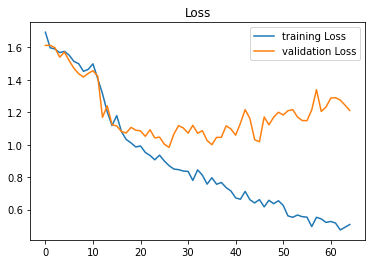

In [27]:
all_loss = model.history["train_loss"]
all_validation_loss = model.history["test_loss"]
plt.plot(all_loss ,label = 'training Loss')
plt.plot (all_validation_loss , label='validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

In [29]:
test_pred = model.predict( testing_data)
test_acc = softmax_accuracy(test_pred, testing_labels)
print("testing_accuracy: " , test_acc * 100 , "%")

testing_accuracy:  77.6 %


In [ ]:
print(testing_labels)

In [30]:
#daisy,dandelion,roses,sunflowers,tulips = np.split(testing_data,5)
#daisy_lbls,dandelion_lbls,roses_lbls,sunflowers_lbls,tulips_lbls=np.split(testing_labels,5)
daisy_test_pred = model.predict( daisy)
#roses_test_acc = softmax_accuracy(roses_test_pred, roses_lbls)
predicted_class = np.argmax(daisy_test_pred, axis=1)

print ('daisy accuracy (CCRn): %.2f ' % (np.mean(predicted_class == daisy_lbls)*100) +'%')
#print(" Roses testing_accuracy (CCRn): " , roses_test_acc * 100 , "%")

daisy accuracy (CCRn): 69.00 %


In [31]:
#daisy,dandelion,roses,sunflowers,tulips = np.split(testing_data,5)
#daisy_lbls,dandelion_lbls,roses_lbls,sunflowers_lbls,tulips_lbls=np.split(testing_labels,5)
dandelion_test_pred = model.predict( dandelion)
#roses_test_acc = softmax_accuracy(roses_test_pred, roses_lbls)
predicted_class = np.argmax(dandelion_test_pred, axis=1)

print ('dandelion accuracy (CCRn): %.2f ' % (np.mean(predicted_class == dandelion_lbls)*100) +'%')
#print(" Roses testing_accuracy (CCRn): " , roses_test_acc * 100 , "%")

dandelion accuracy (CCRn): 44.00 %


In [34]:
#daisy,dandelion,roses,sunflowers,tulips = np.split(testing_data,5)
#daisy_lbls,dandelion_lbls,roses_lbls,sunflowers_lbls,tulips_lbls=np.split(testing_labels,5)
roses_test_pred = model.predict( roses)
#roses_test_acc = softmax_accuracy(roses_test_pred, roses_lbls)
predicted_class = np.argmax(roses_test_pred, axis=1)

print ('Roses accuracy (CCRn): %.2f ' % (np.mean(predicted_class == roses_lbls)*100) +'%')
#print(" Roses testing_accuracy (CCRn): " , roses_test_acc * 100 , "%")

Roses accuracy (CCRn): 42.00 %


In [32]:
#daisy,dandelion,roses,sunflowers,tulips = np.split(testing_data,5)
#daisy_lbls,dandelion_lbls,roses_lbls,sunflowers_lbls,tulips_lbls=np.split(testing_labels,5)
sunflowers_test_pred = model.predict( sunflowers)
#roses_test_acc = softmax_accuracy(roses_test_pred, roses_lbls)
predicted_class = np.argmax(sunflowers_test_pred, axis=1)

print ('sunflowers accuracy (CCRn): %.2f ' % (np.mean(predicted_class == sunflowers_lbls)*100) +'%')
#print(" Roses testing_accuracy (CCRn): " , roses_test_acc * 100 , "%")

sunflowers accuracy (CCRn): 74.00 %


In [33]:
#daisy,dandelion,roses,sunflowers,tulips = np.split(testing_data,5)
#daisy_lbls,dandelion_lbls,roses_lbls,sunflowers_lbls,tulips_lbls=np.split(testing_labels,5)
tulips_test_pred = model.predict( tulips)
#roses_test_acc = softmax_accuracy(roses_test_pred, roses_lbls)
predicted_class = np.argmax(tulips_test_pred, axis=1)

print ('tulips accuracy (CCRn): %.2f ' % (np.mean(predicted_class == tulips_lbls)*100) +'%')
#print(" Roses testing_accuracy (CCRn): " , roses_test_acc * 100 , "%")

tulips accuracy (CCRn): 60.00 %
